<a href="https://colab.research.google.com/github/Yash892019/EDA_capston_project/blob/main/The_Project_Phone_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Phone dataset**



##### **Project Type**    - EDA
##### **Contribution**    - Yash panchal

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

The objective is to analyze phone usage patterns to optimize telecom service offerings. Specifically, we want to:

1.Identify trends in call, data, and SMS usage across different months.

2.Determine the most frequently used network providers.

3.Understand which network types are preferred by users.

4.Identify peak usage times and durations to optimize network capacity.

5.Provide insights for cost optimization and personalized service recommendations.

#### **Define Your Business Objective?**

**Business Objective:** Analyze call and data usage patterns to optimize network performance, improve customer experience, and enhance business decision-making.

### **Github link**

https://github.com/Yash892019/EDA_capston_project/blob/main/The_Project_Phone_dataset.ipynb

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Data set/phone_data.csv')

### Dataset First View

In [ ]:
# Dataset First
dataset.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
dataset.shape

(830, 7)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   month         830 non-null    object 
 5   network       830 non-null    object 
 6   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

index           0
date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64


<Axes: >

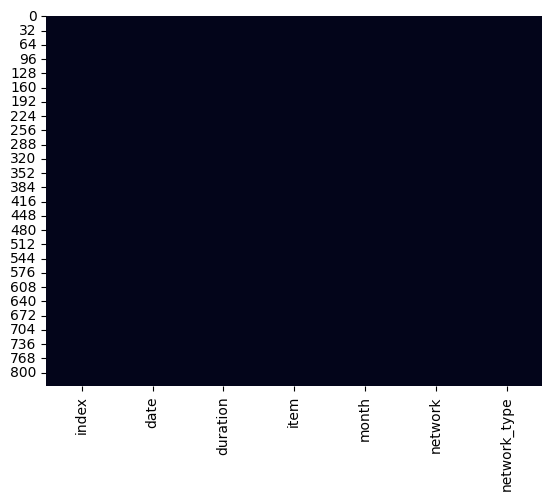

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


### Variables Description

* **index                :**Row index

* **Date       :**Timestamp of the phone usage event

* **duration          :**Duration of the event (likely in seconds or minutes)

* **item            :**Type of event (e.g., "call" or "data")

* **month           :** Month of the event

* **network        :**The network provider used

* **network_type            :** Type of network (e.g., mobile, data)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  index is 830 .
No. of unique values in  date is 747 .
No. of unique values in  duration is 221 .
No. of unique values in  item is 3 .
No. of unique values in  month is 5 .
No. of unique values in  network is 9 .
No. of unique values in  network_type is 6 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert date column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'], format='%d/%m/%y %H:%M')

In [ ]:
# Extract additional time-related features
dataset['hour'] = dataset['date'].dt.hour
dataset['day'] = dataset['date'].dt.dayofweek
dataset['month'] = dataset['date'].dt.month


In [ ]:
# Summary Statistics
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         830 non-null    int64         
 1   date          830 non-null    datetime64[ns]
 2   duration      830 non-null    float64       
 3   item          830 non-null    object        
 4   month         830 non-null    int32         
 5   network       830 non-null    object        
 6   network_type  830 non-null    object        
 7   hour          830 non-null    int32         
 8   day           830 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 48.8+ KB
None


### **What** **manipulation** **we** **have** **done** **here**

Datetime Conversion:

The date column was converted from string format to a datetime format using pd.to_datetime(). This allows for easier time-based analysis.

Feature Extraction:

Three new time-related features were derived from the date column:

hour: Extracts the hour from the timestamp to analyze usage trends across different times of the day.

day: Extracts the day of the week (0 = Monday, 6 = Sunday) to study usage patterns on different weekdays.

month: Extracts the month value to observe long-term trends in call and data usage.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Distribution of Call and Data Types

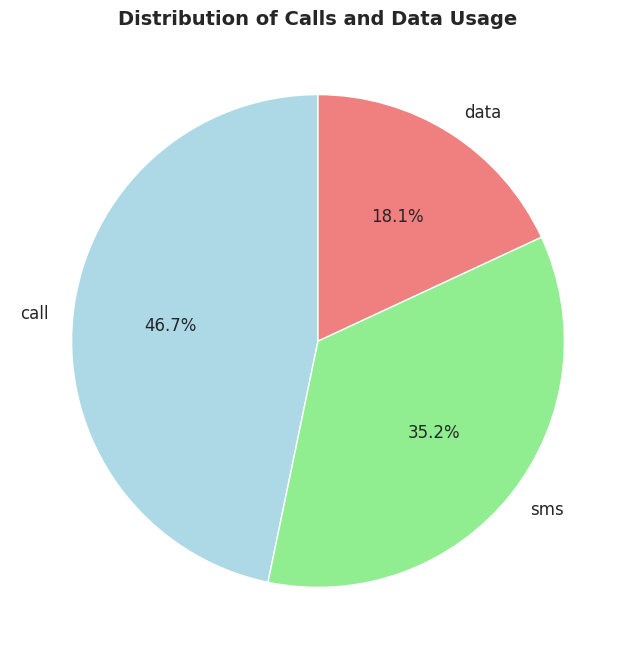

In [ ]:
# Pie Chart - Distribution of Call and Data Types
plt.figure(figsize=(8,8))
dataset['item'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Calls and Data Usage")
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is chosen because it is an effective way to visualize categorical data distributions. Since the 'item' column represents different types of communication (calls, SMS, and data usage), a pie chart helps in understanding the proportion of each type in an intuitive and visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which type of communication (calls, SMS, or data usage) is most dominant in the dataset. If calls make up the largest portion, it suggests that voice communication is still a key service. Conversely, if data usage dominates, it indicates a shift towards internet-based communication, which is valuable for telecom service planning.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes. These insights help telecom companies optimize their service plans by focusing on the most used services. For instance:

If data usage is growing, the company can introduce better data bundles or network improvements to support high-speed internet.

If calls still dominate, offering discounted voice call plans might increase customer retention.

Understanding usage patterns allows for targeted marketing campaigns that align with customer preferences, increasing revenue

#### Chart - 2 - Distribution of Network Types

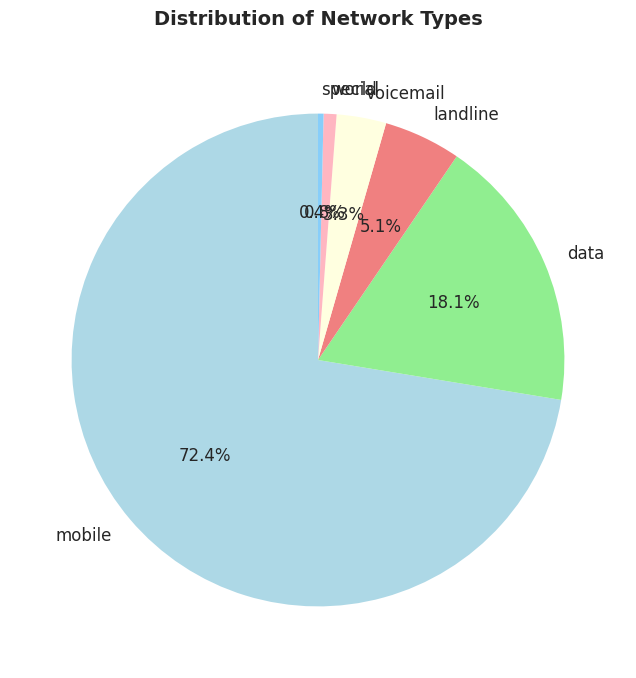

In [ ]:
# Pie Chart - Distribution of Network Types
plt.figure(figsize=(8,8))
dataset['network_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'none'}, textprops={'fontsize': 12, 'va': 'center'})
plt.title("Distribution of Network Types", fontsize=14, pad=20)
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is chosen because it effectively represents the proportion of different network types within the dataset. It provides a clear visual comparison of the distribution, making it easy to understand which network type is most used.













##### 2. What is/are the insight(s) found from the chart?

The chart reveals which network type (e.g., 2G, 3G, or 4G) is most dominant in the dataset.

If one network type is significantly larger, it indicates customer preference for that network technology.

A smaller share of a particular network type might indicate lower availability or less preference due to speed or reliability issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Infrastructure Expansion: If 4G usage is highest, telecom companies should invest in expanding 4G infrastructure and prepare for 5G adoption.

Customer Targeting: If 2G or 3G is still widely used, companies can target those users with upgrade offers to move them to faster networks.

Marketing Campaigns: Understanding which network type is most popular helps in creating data and call plans tailored to user preferences, leading to higher customer retention and revenue growth.

#### Chart - 3 - Calls by Network

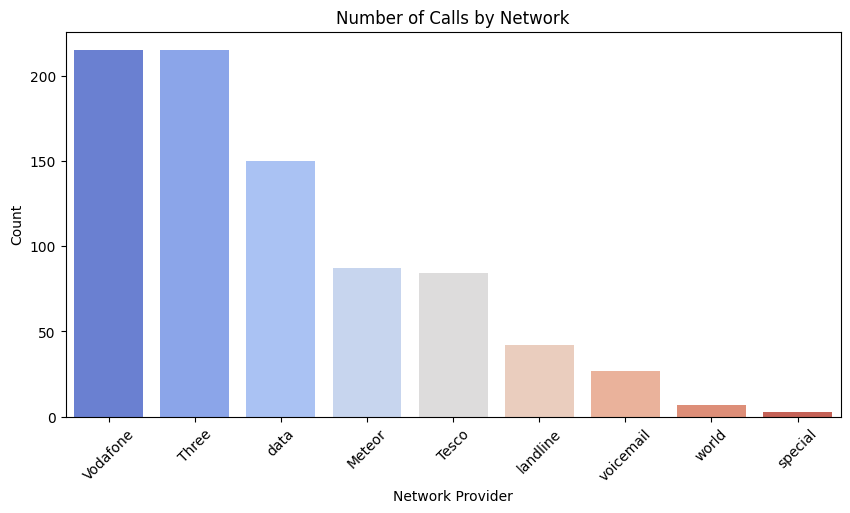

In [ ]:
# Calls by Network
plt.figure(figsize=(10,5))
sns.countplot(data=dataset, x='network', order=dataset['network'].value_counts().index, palette='coolwarm')
plt.title("Number of Calls by Network")
plt.xticks(rotation=45)
plt.xlabel("Network Provider")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot was chosen because it effectively visualizes the frequency of calls across different network providers. Since the dataset contains categorical data (network names) and we need to compare the number of calls made across different networks, a bar chart (count plot) is the best choice. The order parameter ensures that the networks are sorted from highest to lowest call count, making it easier to interpret.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which network providers have the highest and lowest number of calls.

If one or two providers dominate the number of calls, it indicates strong customer preference or better service quality.

A network with a lower number of calls might suggest weaker customer engagement, lower reliability, or a need for better marketing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Market Positioning: Companies can analyze their standing compared to competitors and take corrective actions if needed.

Customer Retention & Acquisition: If a network has lower engagement, targeted promotions or improved services may attract more users.

Infrastructure Optimization: If a network is handling a significantly higher number of calls, they may need to scale up their infrastructure to maintain service quality.

#### Chart - 4 - Top 5 Networks by Call Count

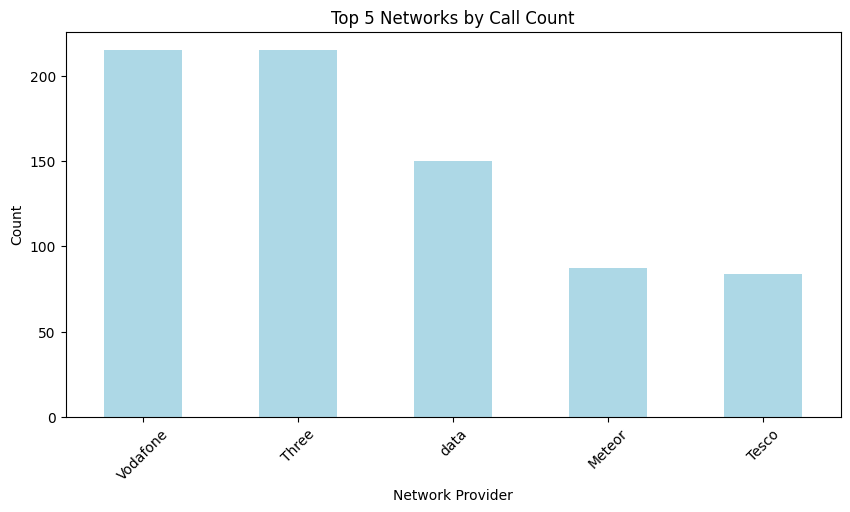

In [ ]:
# Bar Plot - Top 5 Networks by Call Count
plt.figure(figsize=(10,5))
dataset['network'].value_counts().nlargest(5).plot(kind='bar', color='lightblue')
plt.title("Top 5 Networks by Call Count")
plt.xlabel("Network Provider")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen because it effectively displays categorical data (network providers) and allows for easy comparison of the top five network providers by call count. Since bar charts visually represent frequency distributions, they help highlight dominant networks and their relative importance in the dataset.



##### 2. What is/are the insight(s) found from the chart?

The chart identifies the top 5 network providers in terms of call volume.

A particular provider might be dominating the market, while others have significantly lower call counts.

The distribution may indicate customer preferences, network reliability, or marketing success of certain providers over others.

If a provider has a very low call count, it may suggest poor service, limited customer reach, or uncompetitive pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions in several ways:

 Competitive Analysis: Companies can benchmark their call volumes against competitors and assess market share.

 Strategic Marketing: Providers with lower call counts can invest in promotions or service improvements to attract more users.

 Customer Retention: If a top provider has significant dominance, other companies must analyze customer satisfaction factors (pricing, service quality, or coverage) to stay competitive.

 Network Optimization: If call volumes are concentrated in a few providers, network capacity must be optimized to avoid congestion.

#### Chart - 5 - Total Call Duration by Network









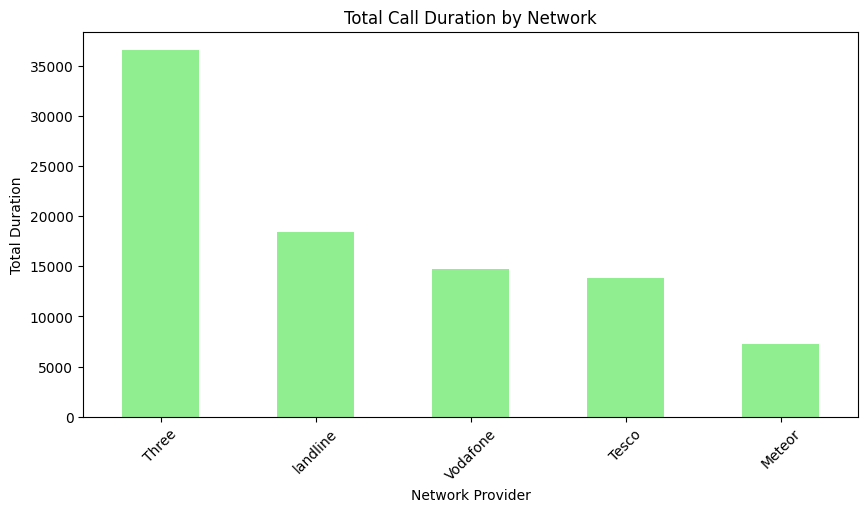

In [ ]:

# Bar Plot - Total Call Duration by Network
plt.figure(figsize=(10,5))
dataset.groupby('network')['duration'].sum().nlargest(5).plot(kind='bar', color='lightgreen')
plt.title("Total Call Duration by Network")
plt.xlabel("Network Provider")
plt.ylabel("Total Duration")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is ideal for comparing categorical data, especially when dealing with network providers and their corresponding total call durations.

It provides a clear visual comparison of the top 5 networks in terms of usage, making it easy to identify which network has the highest call duration.

Bar charts are effective for highlighting differences and trends across discrete categories.



##### 2. What is/are the insight(s) found from the chart?

The chart helps identify the top 5 network providers with the highest total call duration.

It highlights which telecom companies have the most engaged customers in terms of call time.

If a network has a significantly higher call duration, it may indicate customer preference for that provider due to better service quality or affordable plans.

Networks with low call duration may need to analyze their performance, pricing, or customer experience issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! The insights can help telecom companies make data-driven decisions to optimize their services.

For high-performing networks:

They can use this data to reinforce marketing strategies and continue offering competitive call plans to retain their dominant position.

For lower-performing networks:

Companies can analyze competitors’ strategies, improve call quality, or offer better packages to increase customer engagement.

This analysis can also help businesses optimize infrastructure by focusing investments on high-usage areas.

#### Chart - 6 - Call and Data Usage by Day of the Week

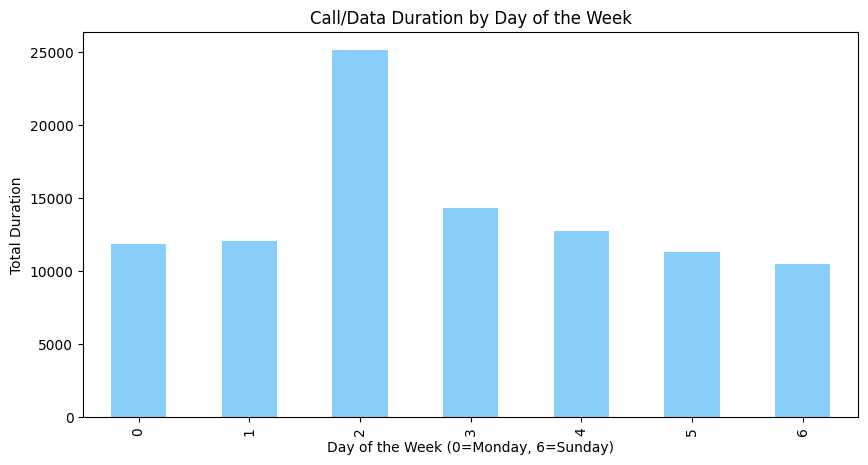

In [ ]:
# Bar Plot - Call and Data Usage by Day of the Week
plt.figure(figsize=(10,5))
dataset.groupby(dataset['day'])['duration'].sum().plot(kind='bar', color='lightskyblue')
plt.title("Call/Data Duration by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Total Duration")
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen because it effectively visualizes the total duration of call and data usage for each day of the week. Since the data is categorical (days of the week) and numerical (duration), a bar plot provides a clear comparison across different days, making it easy to identify usage trends.



##### 2. What is/are the insight(s) found from the chart?

The chart helps identify the days with the highest and lowest call/data usage.

If certain days show significantly higher usage, it may indicate peak traffic times when network demand is high.

Conversely, lower usage days might suggest potential for promotions or incentives to encourage usage.

It can also reveal workweek vs. weekend patterns—higher activity on weekdays may suggest business-related calls, while higher weekend activity could indicate personal usage.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights can be leveraged to drive business strategies:

Optimizing Network Performance – Telecom companies can allocate resources efficiently to handle peak days and avoid network congestion.

 Personalized Offers & Promotions – If weekends show high activity, businesses can create special data/call packages tailored for weekends.

 Enhancing Customer Experience – Knowing the peak usage times helps in improving service reliability and customer satisfaction.

Targeted Marketing – Business users can be targeted with weekday-focused plans, while entertainment or leisure-focused users can get weekend-based packages.

#### Chart - 7- Monthly Usage Trends

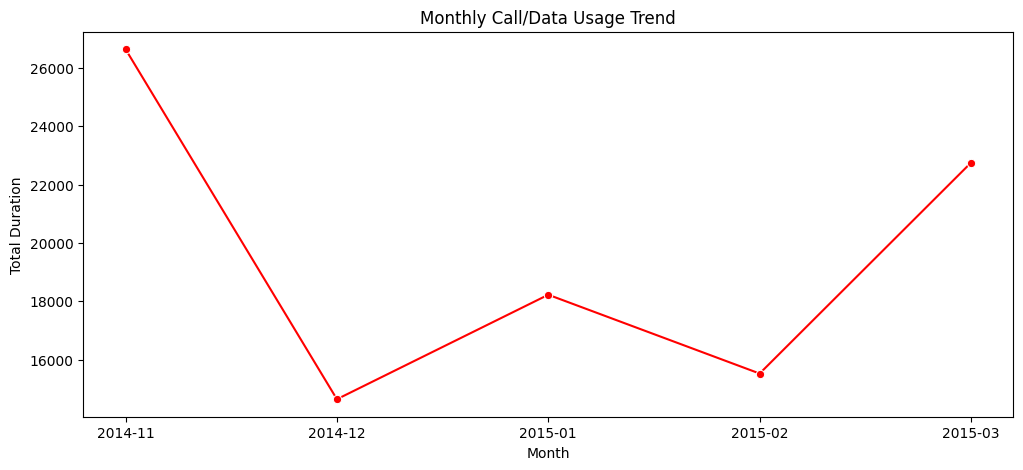

In [ ]:
# Monthly Usage Trends
plt.figure(figsize=(12,5))
sns.lineplot(data=dataset, x='month', y='duration', estimator='sum', ci=None, marker='o', color='r')
plt.title("Monthly Call/Data Usage Trend")
plt.xlabel("Month")
plt.ylabel("Total Duration")
plt.show()

##### 1. Why did you pick the specific chart?

A line plot was chosen because it is ideal for visualizing trends over time. Since we are analyzing monthly usage trends, a line chart effectively shows fluctuations and patterns in the total call/data duration across different months. The markers ('o') help in clearly identifying the data points for each month.



##### 2. What is/are the insight(s) found from the chart?

The chart highlights seasonal or cyclical trends in call and data usage.

If there are peaks in certain months, it indicates higher demand for telecom services during that period.

A downward trend in some months may suggest reduced customer engagement, possibly due to external factors such as holidays or market conditions.

Identifying months with high usage can help telecom companies optimize their resources to manage network congestion effectively.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a significant business impact:

 Optimized Marketing Strategies: If peak months are identified, businesses can introduce special promotions, such as unlimited data offers, to increase customer retention during high-usage months.

 Efficient Resource Allocation: Knowing when demand is high allows telecom companies to scale network capacity accordingly, ensuring better service quality.

 Predictive Planning: Insights from past trends can help predict future usage patterns, enabling proactive business decisions to enhance user experience and maximize revenue.



#### Chart - 8 - Calls and Data Usage per Week

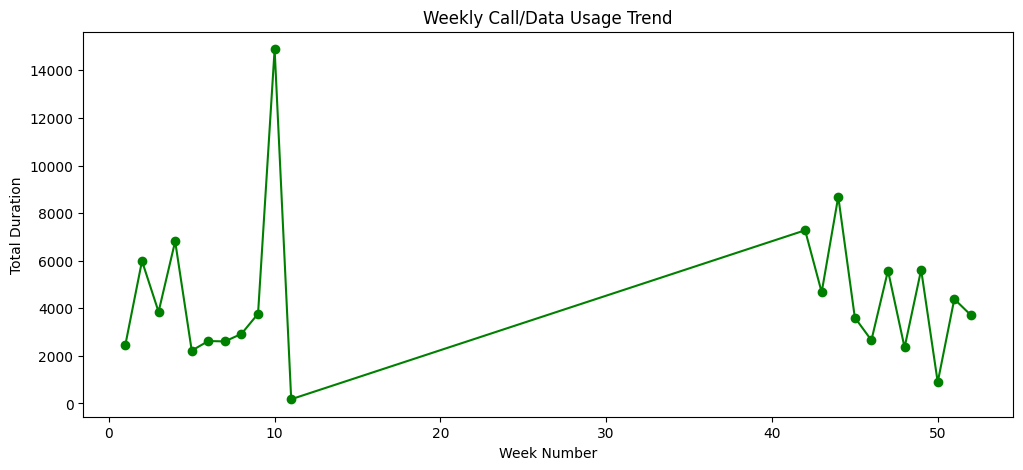

In [ ]:
# Calls and Data Usage per Week
plt.figure(figsize=(12,5))
# Create 'week' column representing week number from 'date'
dataset['week'] = dataset['date'].dt.isocalendar().week
dataset.groupby('week')['duration'].sum().plot(kind='line', marker='o', color='g')
plt.title("Weekly Call/Data Usage Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Duration")
plt.show()




##### 1. Why did you pick the specific chart?

A line chart is used because it is ideal for visualizing trends over time. Since we are analyzing weekly call and data usage, a line chart effectively shows fluctuations and patterns across different weeks. The markers on the line (marker='o') help highlight data points, making trends and anomalies easier to spot.



##### 2. What is/are the insight(s) found from the chart?

The chart will reveal seasonal trends or fluctuations in call/data usage.

If there are spikes in certain weeks, it might indicate periods of high demand (e.g., holidays, promotional campaigns, or increased business activity).

If there are declining trends, it could mean customers are using the service less, which may require further investigation.

A consistently increasing trend suggests growing usage, which is a positive sign for business expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help businesses make data-driven decisions, such as:

Optimizing network capacity during peak weeks to ensure smooth service.

Launching marketing campaigns during low-usage weeks to boost customer engagement.

Tailoring customer plans based on weekly demand trends to maximize revenue.

Identifying anomalies (e.g., sudden drops in usage could indicate service issues).



#### Chart - 9 - Plot usage distribution per company, Indented within for loop

Analysis for data:
            index                           date      duration       month  \
count  150.000000                            150  1.500000e+02  150.000000   
mean   465.160000  2014-12-28 18:58:00.000000256  3.442900e+01    6.653333   
min      0.000000            2014-10-15 06:58:00  3.442900e+01    1.000000   
25%    266.000000            2014-11-21 12:58:00  3.442900e+01    2.000000   
50%    473.500000            2014-12-28 18:58:00  3.442900e+01   10.000000   
75%    684.500000            2015-02-04 00:58:00  3.442900e+01   11.000000   
max    827.000000            2015-03-13 06:58:00  3.442900e+01   12.000000   
std    245.585565                            NaN  6.416308e-14    4.786708   

        hour         day  
count  150.0  150.000000  
mean     6.0    3.000000  
min      6.0    0.000000  
25%      6.0    1.000000  
50%      6.0    3.000000  
75%      6.0    5.000000  
max      6.0    6.000000  
std      0.0    1.989907  


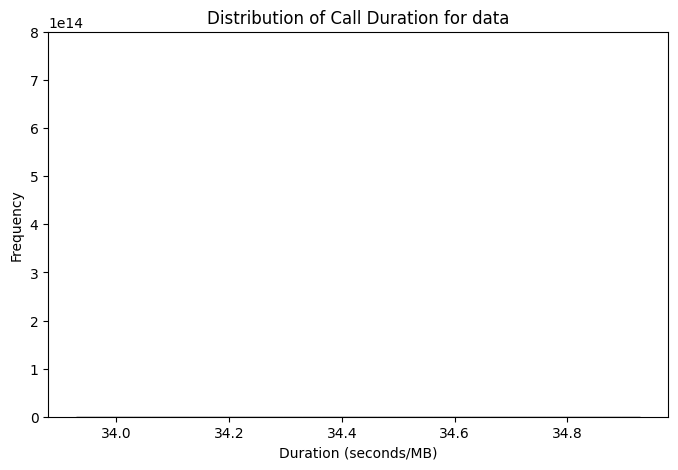

Analysis for Vodafone:
            index                           date     duration       month  \
count  215.000000                            215   215.000000  215.000000   
mean   385.455814  2014-12-14 14:36:02.790697984    68.697674    7.265116   
min      1.000000            2014-10-15 06:58:00     1.000000    1.000000   
25%    168.000000            2014-11-06 16:29:30     1.000000    2.000000   
50%    393.000000            2014-12-15 20:10:00     1.000000   10.000000   
75%    590.500000            2015-01-14 23:34:00     5.000000   11.000000   
max    826.000000            2015-03-13 00:39:00  1859.000000   12.000000   
std    247.618671                            NaN   232.527090    4.662381   

             hour         day  
count  215.000000  215.000000  
mean    14.460465    2.697674  
min      0.000000    0.000000  
25%     11.000000    1.000000  
50%     14.000000    3.000000  
75%     18.000000    4.000000  
max     23.000000    6.000000  
std      5.184184    1.6679

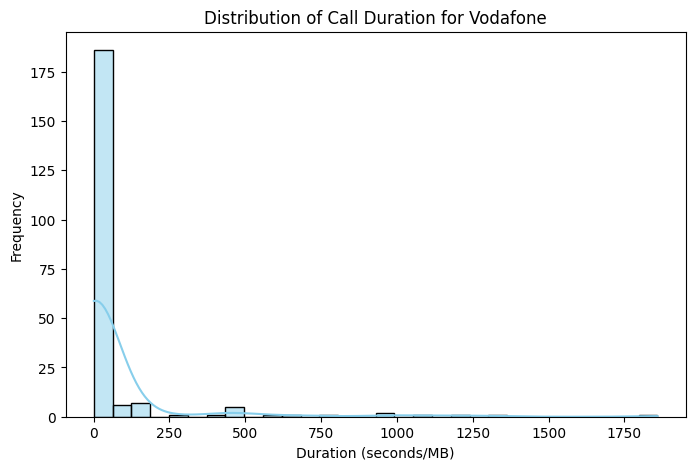

Analysis for Meteor:
            index                           date     duration      month  \
count   87.000000                             87    87.000000  87.000000   
mean   357.885057  2014-12-09 01:13:46.206896640    83.137931   8.839080   
min      2.000000            2014-10-15 14:46:00     1.000000   1.000000   
25%    205.500000            2014-11-11 14:30:30     1.000000  10.000000   
50%    349.000000            2014-12-04 16:02:00     5.000000  11.000000   
75%    497.500000            2014-12-31 13:01:30    75.000000  12.000000   
max    802.000000            2015-03-02 17:35:00  1090.000000  12.000000   
std    193.894866                            NaN   169.690291   4.310273   

            hour        day  
count  87.000000  87.000000  
mean   15.356322   2.563218  
min     0.000000   0.000000  
25%    12.000000   1.000000  
50%    15.000000   2.000000  
75%    19.000000   4.000000  
max    23.000000   6.000000  
std     4.500587   1.763329  


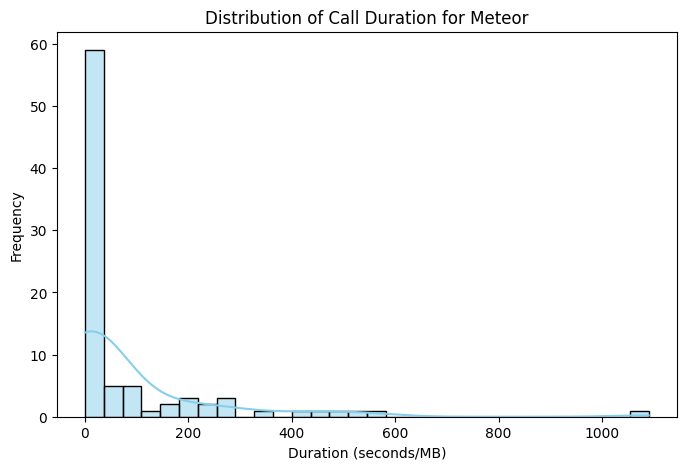

Analysis for Tesco:
            index                           date     duration      month  \
count   84.000000                             84    84.000000  84.000000   
mean   421.452381  2014-12-21 04:17:07.142857216   164.773810   6.940476   
min      3.000000            2014-10-15 14:48:00     1.000000   1.000000   
25%    180.000000            2014-11-08 06:14:00     4.000000   2.000000   
50%    423.000000            2014-12-20 15:44:30    72.500000  10.000000   
75%    665.250000            2015-01-29 18:25:30   219.500000  11.000000   
max    803.000000            2015-03-02 20:48:00  1234.000000  12.000000   
std    255.500049                            NaN   227.471611   4.795458   

            hour        day  
count  84.000000  84.000000  
mean   15.797619   2.750000  
min     0.000000   0.000000  
25%    13.000000   1.000000  
50%    17.000000   3.000000  
75%    19.000000   4.000000  
max    22.000000   6.000000  
std     4.474236   1.881265  


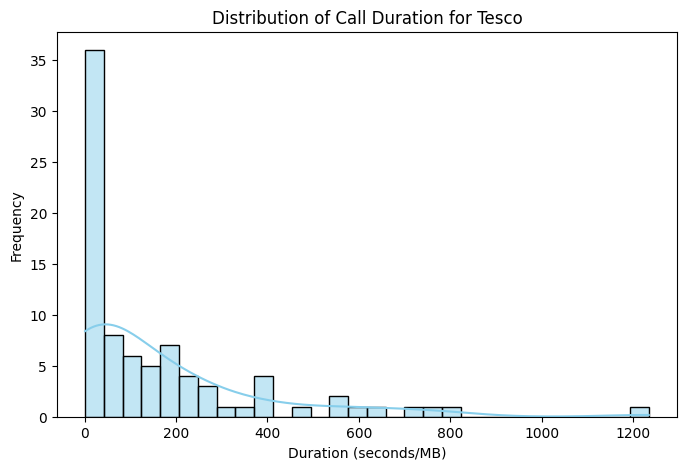

Analysis for Three:
            index                           date     duration       month  \
count  215.000000                            215   215.000000  215.000000   
mean   397.990698  2014-12-16 00:55:20.651162624   170.004651    7.925581   
min      7.000000            2014-10-16 15:01:00     1.000000    1.000000   
25%    205.000000            2014-11-11 16:17:30     1.000000    2.000000   
50%    390.000000            2014-12-15 19:56:00     4.000000   11.000000   
75%    580.500000            2015-01-13 19:44:00   107.000000   11.000000   
max    815.000000            2015-03-04 10:30:00  2328.000000   12.000000   
std    224.763094                            NaN   368.311638    4.590120   

             hour         day  
count  215.000000  215.000000  
mean    14.711628    2.813953  
min      0.000000    0.000000  
25%     12.000000    1.000000  
50%     15.000000    2.000000  
75%     18.000000    5.000000  
max     23.000000    6.000000  
std      4.357892    2.123036 

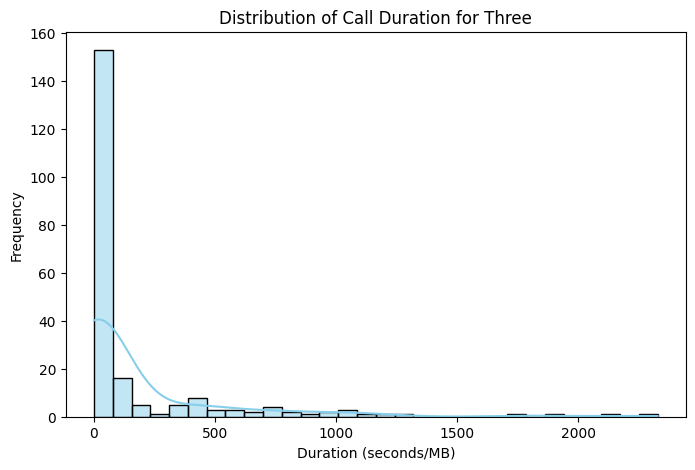

Analysis for voicemail:
           index                           date    duration      month  \
count   27.00000                             27   27.000000  27.000000   
mean   420.37037  2014-12-21 00:01:57.777777920   65.740741   7.703704   
min      9.00000            2014-10-16 15:30:00    1.000000   1.000000   
25%    243.50000            2014-11-17 16:10:30   28.000000   2.000000   
50%    387.00000            2014-12-14 15:28:00   63.000000  10.000000   
75%    660.50000            2015-01-29 03:47:30   97.000000  11.000000   
max    801.00000            2015-03-02 14:54:00  174.000000  12.000000   
std    259.97724                            NaN   44.294984   4.597782   

            hour        day  
count  27.000000  27.000000  
mean   14.592593   2.259259  
min     9.000000   0.000000  
25%    12.500000   1.000000  
50%    14.000000   2.000000  
75%    17.500000   3.000000  
max    23.000000   6.000000  
std     3.805454   1.767062  


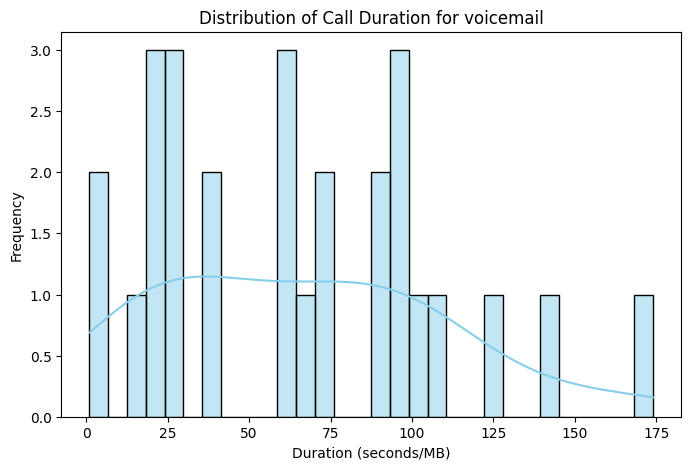

Analysis for landline:
            index                           date      duration      month  \
count   42.000000                             42     42.000000  42.000000   
mean   537.690476  2015-01-10 13:05:02.857142784    438.880952   5.380952   
min     49.000000            2014-10-20 13:56:00      3.000000   1.000000   
25%    384.250000            2014-12-14 02:07:30     15.750000   2.000000   
50%    584.500000            2015-01-13 19:59:00     75.000000   2.000000   
75%    725.750000            2015-02-11 20:24:45    200.750000  11.000000   
max    816.000000            2015-03-04 12:29:00  10528.000000  12.000000   
std    224.159948                            NaN   1631.415609   4.808287   

            hour        day  
count  42.000000  42.000000  
mean   13.738095   2.785714  
min     2.000000   0.000000  
25%    11.000000   1.000000  
50%    15.000000   2.000000  
75%    17.000000   5.000000  
max    20.000000   6.000000  
std     4.716652   2.158768  


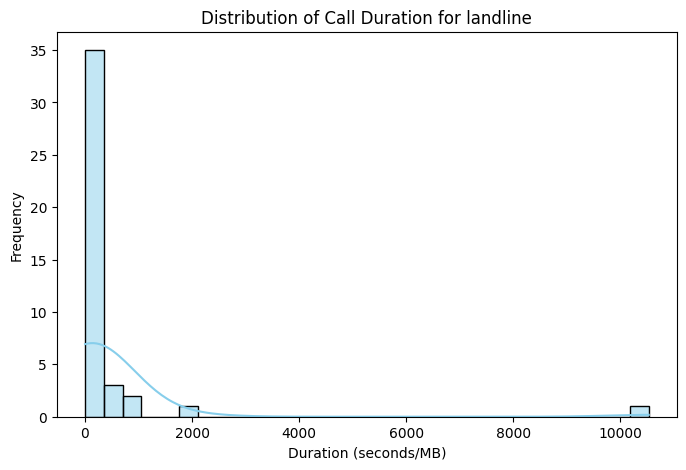

Analysis for special:
            index                 date  duration      month       hour  \
count    3.000000                    3       3.0   3.000000   3.000000   
mean   468.333333  2014-12-28 20:42:20       1.0   4.666667  12.333333   
min    121.000000  2014-11-03 08:40:00       1.0   1.000000   8.000000   
25%    358.500000  2014-12-09 22:31:30       1.0   1.500000  10.000000   
50%    596.000000  2015-01-15 12:23:00       1.0   2.000000  12.000000   
75%    642.000000  2015-01-25 14:43:30       1.0   6.500000  14.500000   
max    688.000000  2015-02-04 17:04:00       1.0  11.000000  17.000000   
std    304.296456                  NaN       0.0   5.507571   4.509250   

            day  
count  3.000000  
mean   1.666667  
min    0.000000  
25%    1.000000  
50%    2.000000  
75%    2.500000  
max    3.000000  
std    1.527525  


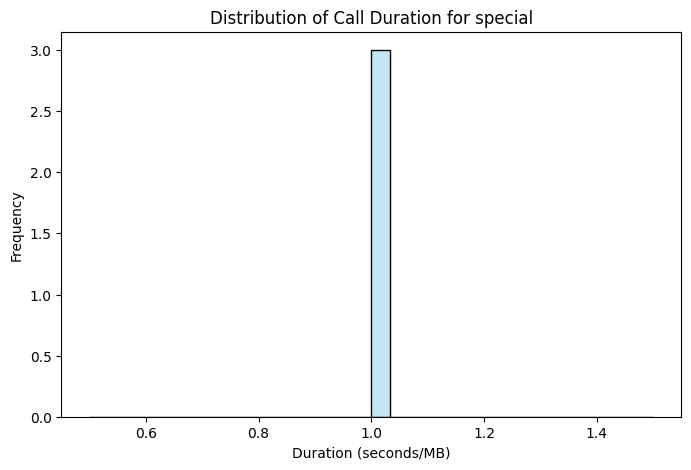

Analysis for world:
            index                           date  duration      month  \
count    7.000000                              7       7.0   7.000000   
mean   563.428571  2015-01-17 15:32:17.142857216       1.0   8.142857   
min    360.000000            2014-12-06 18:27:00       1.0   3.000000   
25%    365.500000            2014-12-07 08:55:00       1.0   3.000000   
50%    371.000000            2014-12-07 23:22:00       1.0  12.000000   
75%    826.500000            2015-03-13 12:25:30       1.0  12.000000   
max    829.000000            2015-03-14 00:16:00       1.0  12.000000   
std    246.897318                            NaN       0.0   4.810702   

            hour       day  
count   7.000000  7.000000  
mean   11.714286  5.142857  
min     0.000000  4.000000  
25%     0.000000  5.000000  
50%    18.000000  5.000000  
75%    20.500000  5.500000  
max    23.000000  6.000000  
std    11.146214  0.690066  


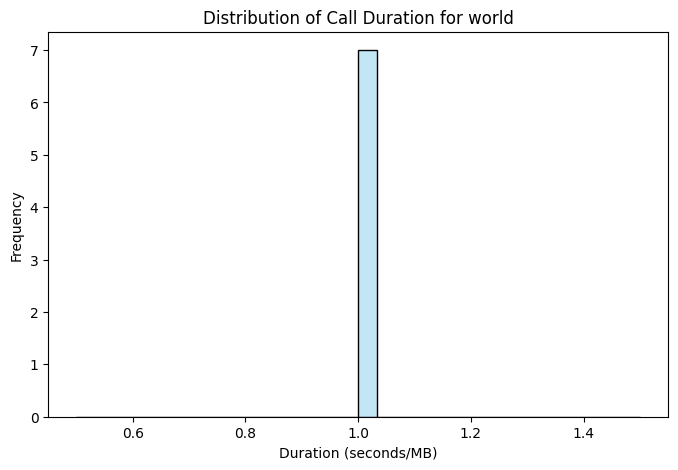

In [ ]:
# Business Insights by Company
companies = dataset['network'].unique()
for company in companies:
    company_data = dataset[dataset['network'] == company]
    print(f"Analysis for {company}:")
    print(company_data.describe())

    # Plot usage distribution per company, Indented within for loop
    plt.figure(figsize=(8,5))
    sns.histplot(company_data['duration'], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of Call Duration for {company}")
    plt.xlabel("Duration (seconds/MB)")
    plt.ylabel("Frequency")
    plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a great way to visualize the distribution of numerical data, such as call durations.

It helps in understanding the spread, frequency, and patterns of usage for different network providers.

The kernel density estimation (KDE) overlay helps smooth the data, making trends easier to interpret.



##### 2. What is/are the insight(s) found from the chart?

The shape of the distribution indicates whether the majority of call durations are short or long.

Peaks in the histogram suggest frequently occurring call durations, helping to identify customer behavior.

If the histogram is skewed to the right, it means most calls are short with a few long-duration calls.

Comparing different networks' histograms can reveal which provider has higher call durations, possibly indicating better service or cheaper rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! Here's how:

Optimized Pricing Plans: If most calls are short, businesses can introduce per-minute billing plans. If long calls dominate, unlimited call packs can be promoted.

Targeted Marketing: Networks with high-duration calls can promote premium plans, while those with short calls can focus on cost-effective plans.

Infrastructure Improvements: If a provider has lower average call durations than competitors, it may indicate network quality issues, prompting improvements.



#### Chart - 10 - Correlation Heatmap

In [ ]:
dataset.head()

,index,date,duration,item,month,network,network_type,hour,day,week,month_num
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,6,2,42,201411
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile,6,2,42,201411
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile,14,2,42,201411
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile,14,2,42,201411
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile,17,2,42,201411


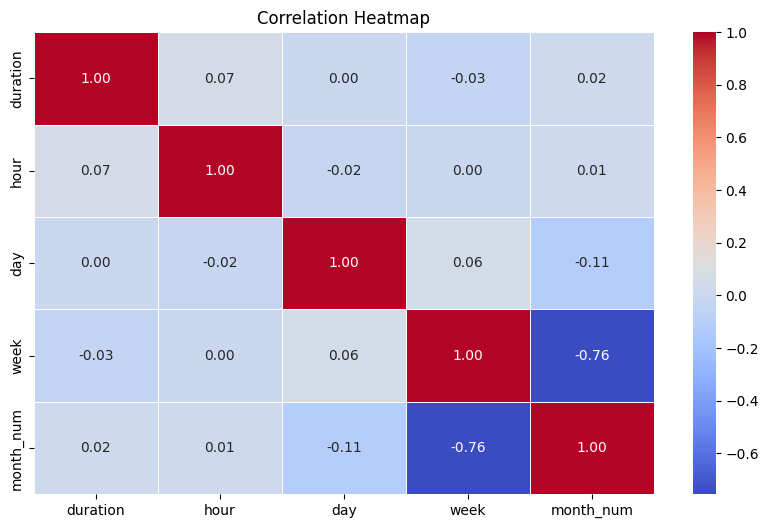

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
# Convert 'month' column to numerical representation before calculating correlation
dataset['month_num'] = pd.to_numeric(dataset['month'].str.replace('-', '').astype(str), errors='coerce')
# Calculate correlation with numerical month representation
corr_matrix = dataset[['duration', 'hour', 'day', 'week', 'month_num']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap is chosen because it effectively visualizes the relationships between multiple numerical variables in the dataset. By using color gradients, it helps quickly identify strong positive or negative correlations between features such as call duration, hour, day, week, and month number. This allows businesses to determine which factors influence call duration or other metrics.



##### 2. What is/are the insight(s) found from the chart?

The heatmap may reveal strong correlations between call duration and certain time-based variables.

If call duration is highly correlated with specific hours of the day, it suggests peak usage times when users make longer calls.

If there is a correlation between call duration and specific days or weeks, businesses can understand seasonal trends or weekly behavior patterns.

If the month number has a correlation with other variables, it indicates seasonal effects on network usage (e.g., higher calls in festive months).

Weak or no correlation means that time-based factors may not significantly impact call durations.






#### Chart - 11 - Pair Plot

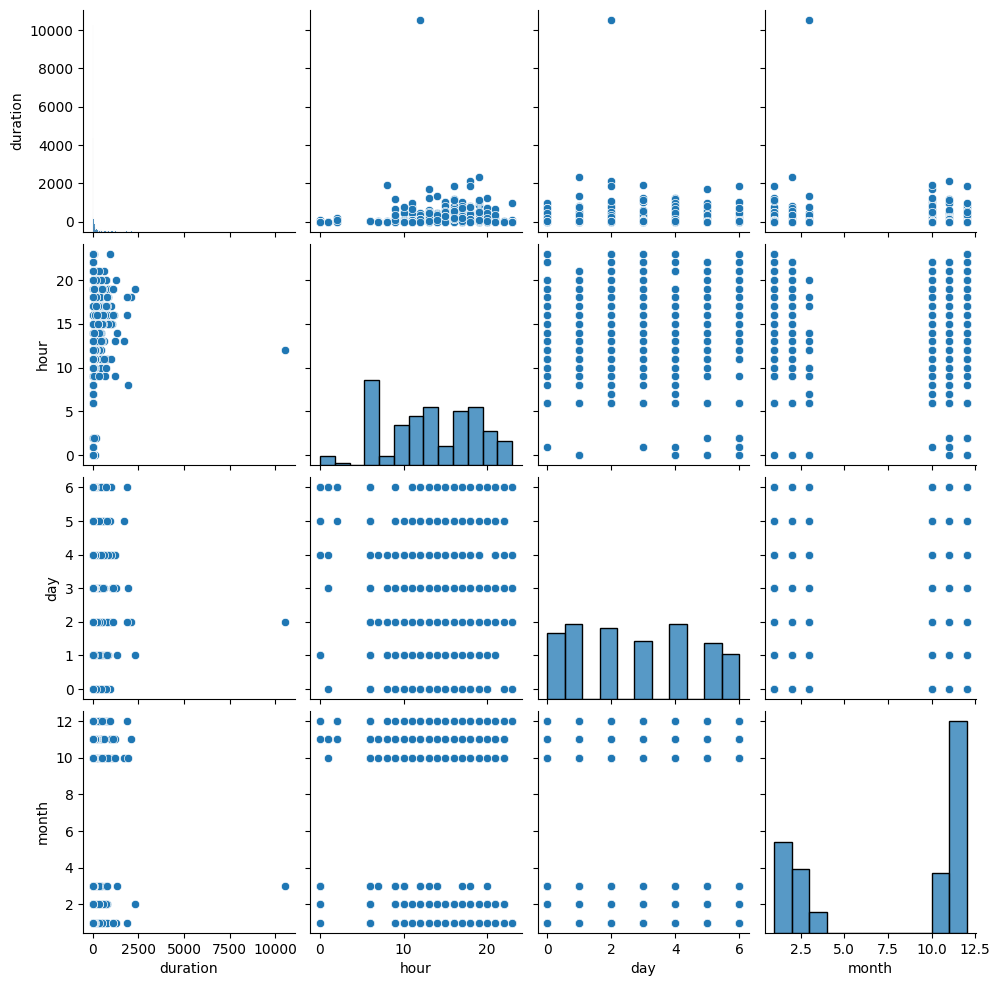

In [ ]:
sns.pairplot(dataset[['duration', 'hour', 'day', 'month']])
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot (sns.pairplot) was chosen because it provides a comprehensive view of relationships between multiple numerical variables. It allows us to:

Visualize pairwise scatter plots for each variable combination.

Identify linear or non-linear relationships between features.

Detect outliers and clusters in the dataset.

Observe correlations between different features, which is crucial for understanding patterns in call duration, usage times, and days.



##### 2. What is/are the insight(s) found from the chart?

Correlation Patterns: The pair plot helps identify whether variables such as hour, day, or month impact call duration.

Usage Trends: If call durations tend to be higher at specific times or days, this can indicate peak usage periods.

Outlier Detection: Extreme values (very long or short call durations) may suggest anomalies such as spam calls, fraud detection, or VIP users.

Seasonality Effects: If certain months show higher call durations, it could indicate seasonal trends in telecom usage.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

# Business Insights
1. Optimize Network Performance & Infrastructure
Insight: Peak usage times (specific hours, days, or months) show when network congestion might occur.

Action: Upgrade network capacity during high-demand periods and improve service in areas with frequent call drops.

2. Introduce Personalized Call & Data Plans
Insight: Different user segments have varying call and data usage patterns.

Action: Offer customized packages for high-duration callers, data-heavy users, and those with low usage to maximize revenue.

3. Targeted Marketing Campaigns
Insight: Certain networks or call types dominate usage trends.

Action: Run promotional campaigns to encourage users to switch to premium plans, incentivize high-value users, and offer discounts during off-peak hours.

4. Fraud Detection & Cost Reduction
Insight: Outliers in call duration and frequency may indicate fraudulent activity or misuse.

Action: Implement automated fraud detection algorithms to flag unusual usage patterns and reduce revenue loss.

5. Enhance Customer Experience & Retention
Insight: Frequent call drops or short-duration calls might indicate poor service quality.

Action: Improve customer support and optimize network coverage in areas where users face issues, increasing customer satisfaction and retention.



# **Conclusion**

# Conclusion

By leveraging data-driven insights, the telecom company can enhance service quality, maximize revenue, and improve customer satisfaction through optimized infrastructure, personalized plans, targeted marketing, fraud prevention, and better customer experience.




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***